In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from os.path import expanduser, exists

from src.connectome import Connectome
from src.skeleton_morphology import run_morphology_analysis
from src.utils import load_preprocessed_connectome, yymmdd_today
from vis.fig_tools import subtype_cm

plt.rcdefaults()
plt.style.use('vis/lamina.mplstyle')

SyntaxError: invalid syntax (skeleton_morphology.py, line 98)

In [ ]:
# load connectome object
tp = '200507'
C = load_preprocessed_connectome(f"~/Data/{tp}_lamina/")

In [ ]:
# Compute or load LMC morphology data
results_file = expanduser(f'~/Data/{tp}_lamina/{yymmdd_today()}_lmc-morphology.json')
subtypes = ['LMC_1', 'LMC_2', 'LMC_3', 'LMC_4', 'LMC_N']#, 'LMC_3', 'LMC_4']#, 'LMC_N']#, 'R7', 'R8', 'R7p']
these_skel = [s for s, data in C.skel_data.items() if data.subtype in subtypes]

if exists(results_file):
    with open(results_file, 'r') as fh:
        d = json.load(fh)
else:
    d = run_morphology_analysis(C, lmc_ids, restrict_tags='lamina_end', save_file=expanduser(results_file), verbose=False)

segments, central_segs, seg_lens, seg_dists = d['segments'], d['central_segs'], d['seg_lengths'], d['seg_distances'] 

For a given neuron, we can find out:
1. Number of branch points
2. Branch order distribution

[Universal features of dendrites through centripetal branch ordering](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5515450/)
- Horton-Strahler order (SO): A method developed to characterise branch points in a river
- SO is a centripetal ordering scheme: All terminal branches are assigned order 1. When two branches of order k meet, the parent branch is assigned order k+1. If branches of different orders meet, the larger k is used to determine the SO of the parent.  
- "(Findings that report SO) have little descriptive power if the underlying structure is a binary tree". See: ["Horton's law of stream numbers"](https://pubs.geoscienceworld.org/gsa/gsabulletin/article-abstract/56/3/275/4075/EROSIONAL-DEVELOPMENT-OF-STREAMS-AND-THEIR?redirectedFrom=fulltext) and 
[Statistical inevitability of Horton's laws and the apparent randomness of stream channel networks](https://doi.org/10.1130/0016-7606(1945)56[275:EDOSAT]2.0.CO;2)
- In contrast to Strahler order, centrifugal ordering schemes start from the root and end at the leaves. Order is 0 (or sometimes 1) at the root and increases by one at each branch point


In [ ]:
summary = []
for skel_id in these_skel:
    data = C.skel_data[skel_id]
    summary.append({'name': data.name,
                         'skel_id': data.skel_id,
                         'om': data.group,
                         'subtype': data.subtype,
                         'n_central_nodes': len(central_segs[skel_id]), 
                         'n_nodes': len(data.skel_nodes) - len(data.r_nodes), 
                         'n_segments': len(segments[skel_id])})
summary = pd.DataFrame(summary).set_index('skel_id')
summary.head()

In [ ]:
for n in C.skel_data['150'].skel_nodes:
    if n[1] is None:
        print(n)
    

In [25]:
segments

[autoreload of src.skeleton_morphology failed: Traceback (most recent call last):
  File "/mnt/home/nchua/miniconda3/envs/wasp/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/mnt/home/nchua/miniconda3/envs/wasp/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/mnt/home/nchua/miniconda3/envs/wasp/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/mnt/home/nchua/miniconda3/envs/wasp/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", li

{'25': {'7': [7, 8, 277486, 9, 10, 2446, 11, 12, 223750],
  '499512': [223750, 499512, 223749, 223748],
  '39': [223750,
   39,
   40,
   13,
   287112,
   287111,
   15,
   41,
   269143,
   313466,
   18,
   42,
   19,
   276245],
  '276246': [276245, 276246, 276247, 276244, 276257],
  '113081': [276245, 113081, 3675, 43, 273670, 20, 288329],
  '288328': [288329,
   288328,
   273674,
   288317,
   288318,
   288319,
   288320,
   288321,
   288322,
   288323,
   288324,
   288325,
   288326,
   288327],
  '2450': [288329, 2450, 21, 22, 23, 277290, 24, 25, 26]},
 '150': {'2156': [2156, 414328, 2157, 414700],
  '414710': [414700, 414710],
  '414718': [414710, 414718],
  '414719': [414718,
   414719,
   414722,
   414720,
   414721,
   414725,
   414726,
   414727,
   414728,
   414729,
   412553,
   414730],
  '332486': [414718, 332486, 2158, 414715],
  '414716': [414715, 414716, 414717, 414731, 412805, 414732, 414052, 414733],
  '2159': [414715,
   2159,
   414734,
   414735,
   4147

In [4]:
b_data = list()
b_nodes = dict()
min_nodes = 10
lmcs = ['LMC_1', 'LMC_2', 'LMC_3', 'LMC_4', 'LMC_N']

for skel_id, data in C.skel_data.items():
    if data.subtype not in lmcs:
        continue
    else:
        branches = segment_skeleton(skel_id, cfg=C.cfg, nodes=data.skel_nodes)
        filtered = {b: n for b, n in branches.items() if len(n) > min_nodes}
        
        b_nodes[skel_id] = list(branches.keys())
        
        b_data.append({'name': data.name,
                       'skel_id': data.skel_id,
                       'om': data.group,
                       'subtype': data.subtype,
                       'n_branches': len(filtered)})
        

In [5]:
df = pd.DataFrame(b_data)



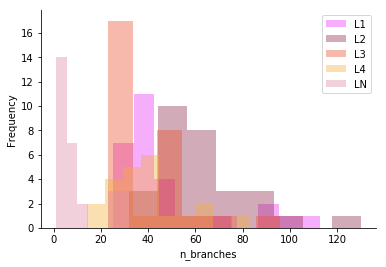

In [6]:
fig, ax = plt.subplots(1)
ax.set_title('')
ax.set_xlabel('Number of branches')
ax.set_ylabel('Frequency')

st_cm = subtype_cm()

for post in lmcs:
    x = df.loc[df['subtype'] == post, 'n_branches']
    sns.distplot(x, ax=ax, color=st_cm[post], label='L'+post[-1], kde=False)

ax.legend()

In [7]:
end_nodes = dict()
for i, data in df.iterrows():
    node_list = C.skel_data[data.skel_id].skel_nodes
    ends = find_end_points(node_list)
    df.loc[i, 'n_ends'] = len(ends)
    
    end_nodes[data.skel_id] = ends

In [8]:
df

,n_branches,name,om,skel_id,subtype,n_ends
0,5,omB6_LN,B6,25,LMC_N,8.0
1,4,omE7_LN,E7,150,LMC_N,7.0
2,8,omA5_LN,A5,508,LMC_N,20.0
3,3,omD7_LN,D7,2585,LMC_N,8.0
4,11,omA3_LN,A3,5038,LMC_N,30.0
5,26,omB3_LN,B3,5227,LMC_N,80.0
6,27,omB2_LN,B2,6049,LMC_N,75.0
7,23,omE7_L3,E7,8145,LMC_3,50.0
8,61,omA3_L2,A3,12794,LMC_2,153.0
9,23,omA3_L3,A3,13063,LMC_3,76.0


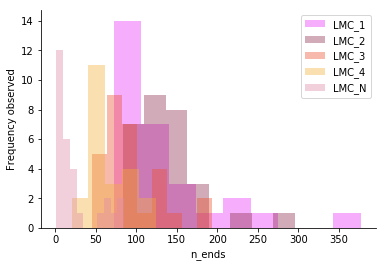

In [9]:
fig, ax = plt.subplots(1)
ax.set_title('')
ax.set_xlabel('Number of branches')
ax.set_ylabel('Frequency observed')

st_cm = subtype_cm()

for post in lmcs:
    x = df.loc[df['subtype'] == post, 'n_ends']
    sns.distplot(x, ax=ax, color=st_cm[post], label=post,kde=False)

ax.legend()

In [10]:
len_data = dict()

for skel_id, data in C.skel_data.items():
    if data.subtype not in lmcs:
        continue
    else:
        len_data[skel_id] = branch_lengths(data.skel_nodes, 
                                           b_nodes[skel_id], 
                                           end_nodes[skel_id],
                                           C.cfg)

NameError: name 'node_coords' is not defined